<a href="https://colab.research.google.com/github/aghila-cs/python/blob/main/unsupervised_learning_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv('/content/force2020_data.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [21]:
df.shape

(18270, 6)

In [22]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [23]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [24]:
df.drop('NPHI', axis=1, inplace=True)
df.drop('PEF', axis=1, inplace=True)

In [26]:
df['DTC'] = df['DTC'].fillna(df['DTC'].mean())

In [27]:
df.isna().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
DTC,0


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


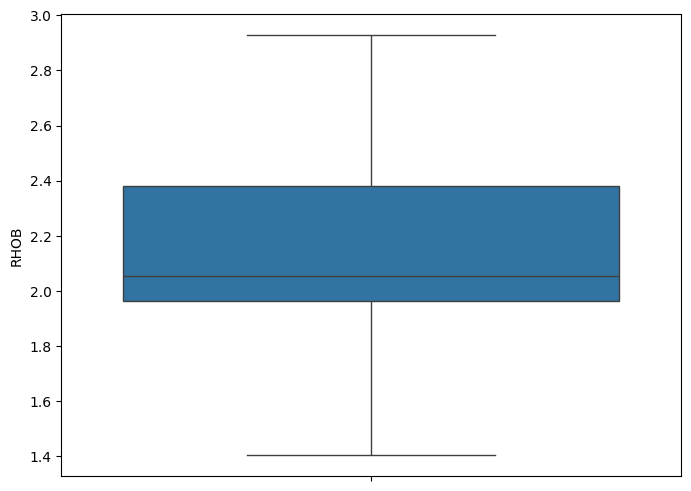

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


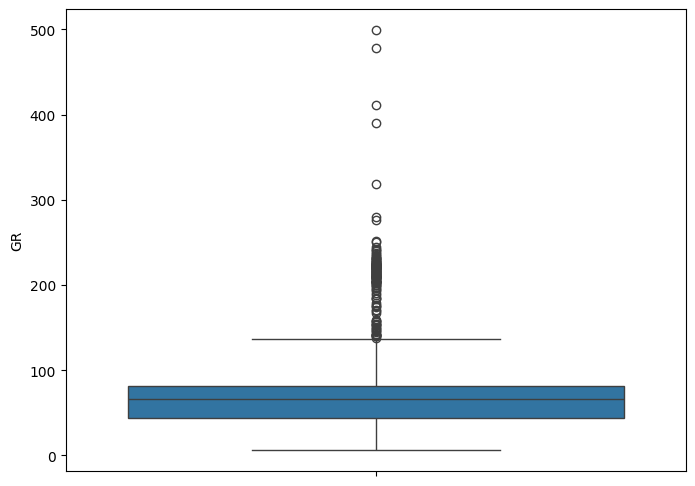

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


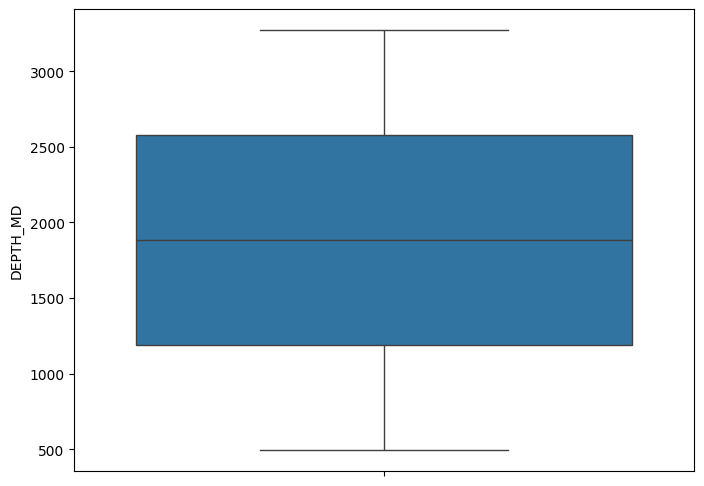

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


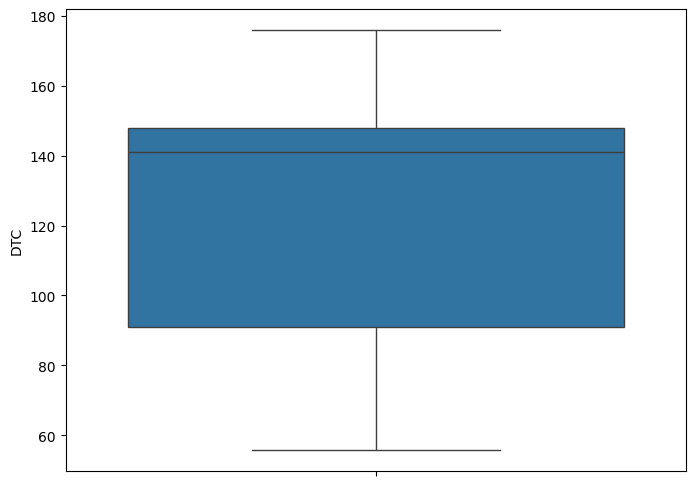

In [29]:
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column])
    plt.show()

In [30]:
q1 = df["GR"].quantile(0.25)
q3 = df["GR"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df["GR"] = df["GR"].clip(lower_bound, upper_bound)

In [32]:
print(df['GR'])

0        80.200851
1        79.262886
2        74.821999
3        72.878922
4        71.729141
           ...    
18265    19.418915
18266    21.444370
18267    22.646879
18268    22.253584
18269    19.829920
Name: GR, Length: 18270, dtype: float64


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

In [35]:
data_scaled = pd.DataFrame(x_scaled, columns=df.columns)
data_scaled

,RHOB,GR,DEPTH_MD,DTC
0,-0.759999,0.648114,-1.731721,1.179232e+00
1,-0.741163,0.612133,-1.731532,1.161958e+00
2,-0.718560,0.441774,-1.731342,1.147887e+00
3,-0.734045,0.367235,-1.731152,1.147096e+00
4,-0.773944,0.323128,-1.730963,1.146405e+00
...,...,...,...,...
18265,1.745819,-1.683564,1.731081,4.651740e-16
18266,1.789158,-1.605864,1.731271,4.651740e-16
18267,1.917421,-1.559734,1.731461,4.651740e-16
18268,2.109002,-1.574822,1.731650,4.651740e-16


In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [37]:
pred_cluster = kmeans.predict(data_scaled)

In [38]:
pred_cluster

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

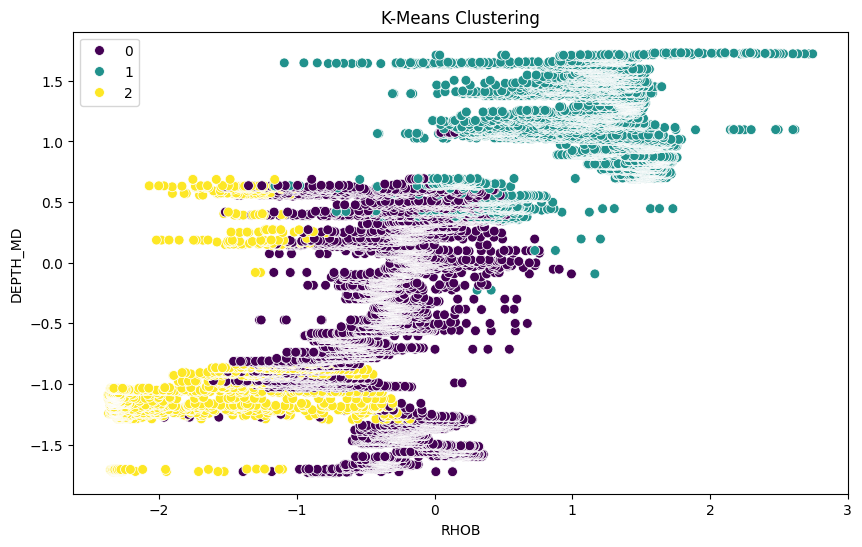

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_scaled['RHOB'], y=data_scaled['DEPTH_MD'], hue=pred_cluster, palette='viridis', s=50)
plt.title('K-Means Clustering')
plt.show()


In [41]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,init='k-means++',random_state=42) # Changed 'K-means++' to 'k-means++'
  kmeans.fit(data_scaled)
  wcss.append(kmeans.inertia_)

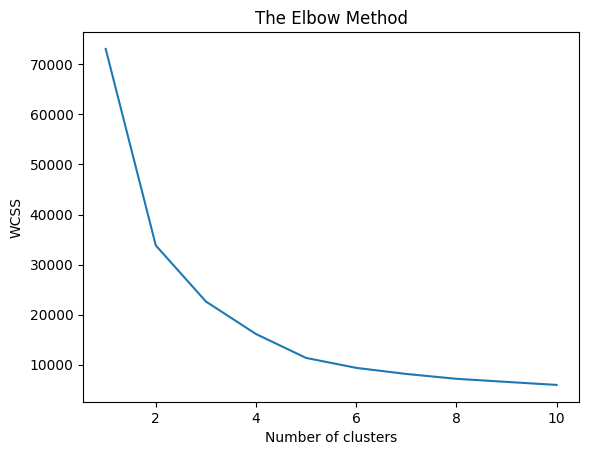

In [42]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
from scipy.cluster.hierarchy import dendrogram,linkage

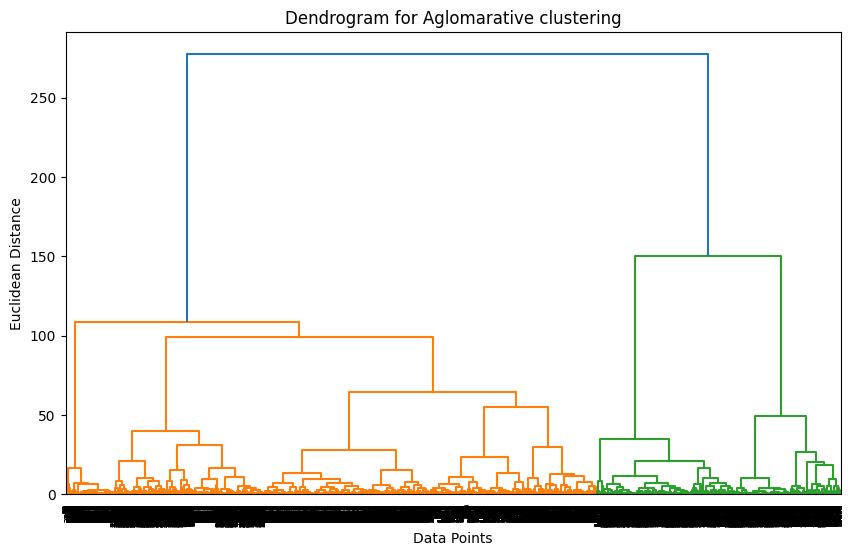

In [44]:
z=linkage(data_scaled,'ward')
plt.figure(figsize=(10,6))
dendrogram(z)
plt.title('Dendrogram for Aglomarative clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()